In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("india.csv")

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 5 columns):
Date                    1025 non-null object
State/UnionTerritory    1025 non-null object
Cured                   1025 non-null int64
Deaths                  1025 non-null int64
Confirmed               1025 non-null int64
dtypes: int64(3), object(2)
memory usage: 40.2+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
1020,2020-04-16,Telengana,120,18,698
1021,2020-04-16,Tripura,1,0,2
1022,2020-04-16,Uttarakhand,9,0,37
1023,2020-04-16,Uttar Pradesh,68,13,773
1024,2020-04-16,West Bengal,42,7,231


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 5 columns):
Date                    1025 non-null datetime64[ns]
State/UnionTerritory    1025 non-null object
Cured                   1025 non-null int64
Deaths                  1025 non-null int64
Confirmed               1025 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 40.2+ KB


In [9]:
df.sort_index(inplace=True)

In [10]:
gp = df.groupby(by=['Date'])

In [11]:
q = gp.agg({'Cured':'sum', 'Deaths':'sum', 'Confirmed':'sum'})
q

,Cured,Deaths,Confirmed
Date,,,
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-01,0,0,2
2020-02-02,0,0,3
2020-02-03,0,0,3
...,...,...,...
2020-04-12,765,273,8447
2020-04-13,980,324,9352
2020-04-14,1190,353,10815


In [12]:
q['fatality rate'] = q['Deaths']/q['Confirmed']
q['active cases'] = q['Confirmed'] - q['Deaths'] - q['Cured']
q['active cases'] = q['active cases'] + q['active cases']*0.1

In [13]:
q['active cases']

Date
2020-01-30        1.1
2020-01-31        1.1
2020-02-01        2.2
2020-02-02        3.3
2020-02-03        3.3
               ...   
2020-04-12     8149.9
2020-04-13     8852.8
2020-04-14    10199.2
2020-04-15    11216.7
2020-04-16    11906.4
Name: active cases, Length: 78, dtype: float64

In [14]:
q['Date_'] = q.index
q['Date_'] = q['Date_'].astype('str')

In [15]:
q.head(2)

,Cured,Deaths,Confirmed,fatality rate,active cases,Date_
Date,,,,,,
2020-01-30,0,0,1,0.0,1.1,2020-01-30
2020-01-31,0,0,1,0.0,1.1,2020-01-31


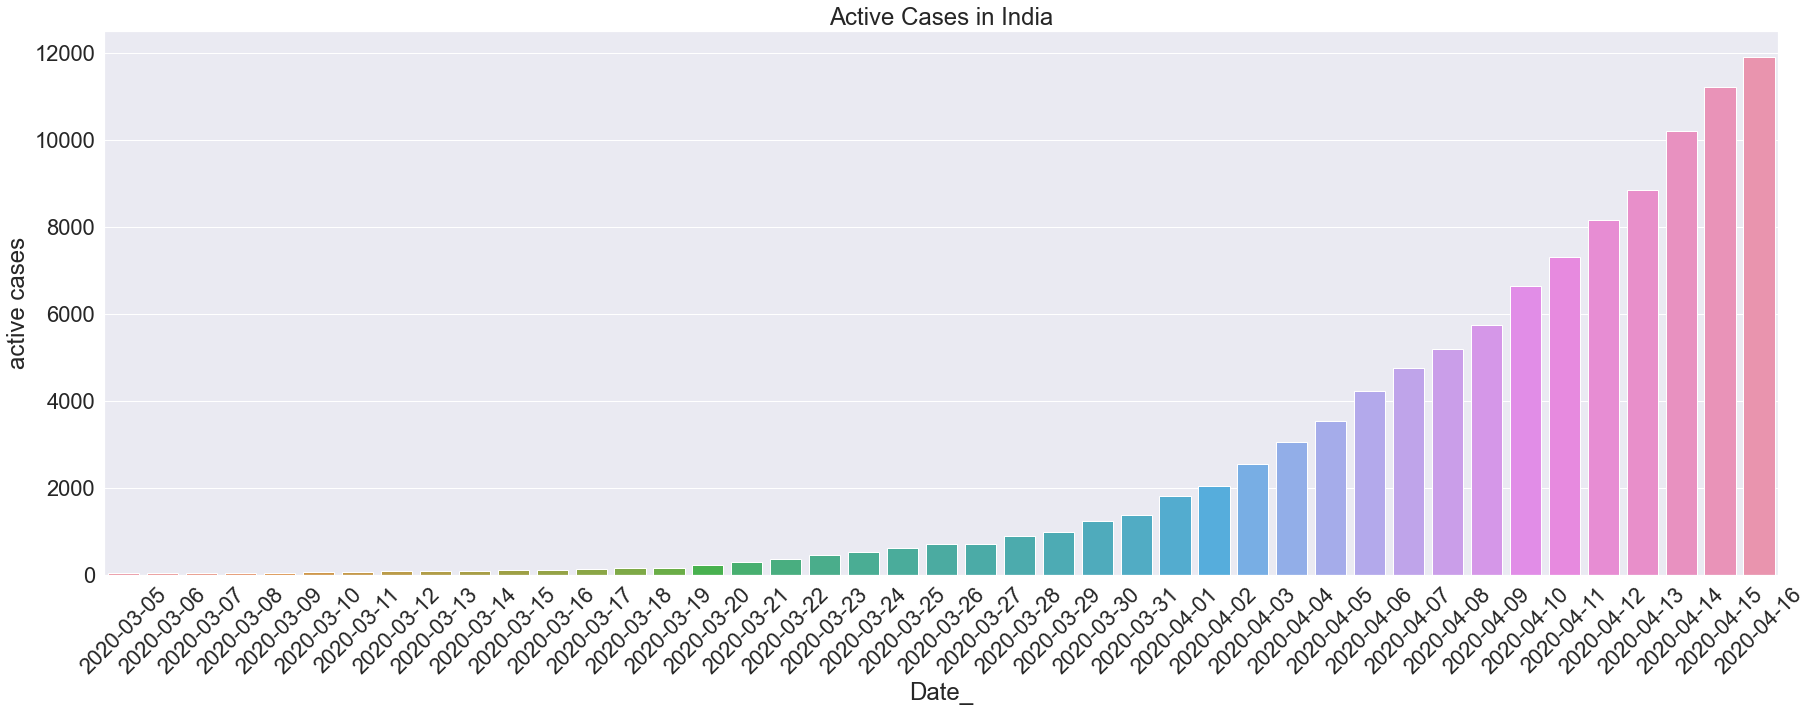

In [35]:
# # Active cases plot:
import matplotlib
SMALL_SIZE = 12
matplotlib.rc('font', size=SMALL_SIZE)
plt.rcParams.update({'font.size': 12})

matplotlib.rc('axes', titlesize=SMALL_SIZE)

#ax.legend(handles=legend_elements, loc='center')

sns.set(font_scale=2)
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)


plt.title('Active Cases in India')
sns.barplot(data=q.iloc[35:,:], x='Date_',y='active cases')


Date
2020-01-30    2020-01-30
2020-01-31    2020-01-31
2020-02-01    2020-02-01
2020-02-02    2020-02-02
2020-02-03    2020-02-03
                 ...    
2020-04-11    2020-04-11
2020-04-12    2020-04-12
2020-04-13    2020-04-13
2020-04-14    2020-04-14
2020-04-15    2020-04-15
Name: Date_, Length: 77, dtype: object

In [17]:
# Maharasthra, tamilnadu, delhi, telangana, rajashtan, up, ap, kerala, mp, gujrat, karnataka, haryana, jk, punjab, westbengal, orissa, bihar

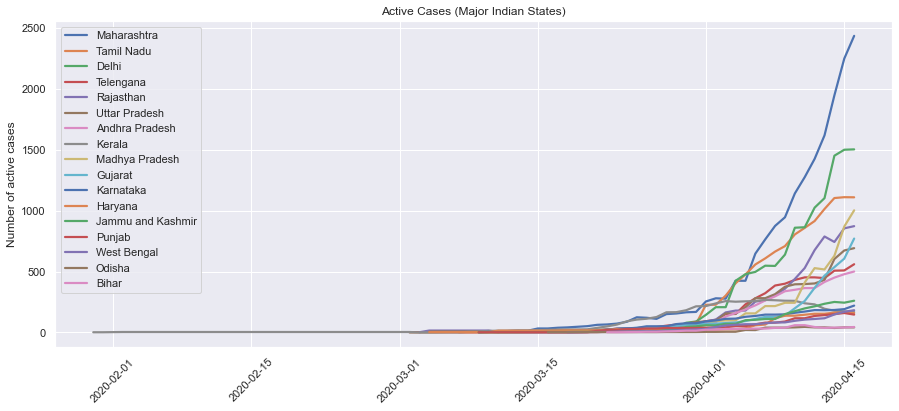

In [41]:
states = ['Maharashtra','Tamil Nadu','Delhi','Telengana','Rajasthan','Uttar Pradesh', 
          'Andhra Pradesh','Kerala','Madhya Pradesh','Gujarat','Karnataka','Haryana', 'Jammu and Kashmir',
          'Punjab', 'West Bengal','Odisha', 'Bihar']
sns.set(font_scale=1)
plt.figure(figsize=(15,6))
for each in states:
    t = df[df['State/UnionTerritory'] == each]
    x = t.groupby('Date')
    w = x.agg({'Cured':'sum', 'Deaths':'sum', 'Confirmed':'sum'})
    w['active cases'] = w['Confirmed'] - w['Deaths'] - w['Cured']
    
    
    plt.xticks(rotation=45)
    plt.ylabel('Number of active cases')
    plt.title('Active Cases (Major Indian States)')
    plt.plot(w['active cases'], label=each, linewidth=2.2)
    plt.legend()

C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys
C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  
C:\Users\ak.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys


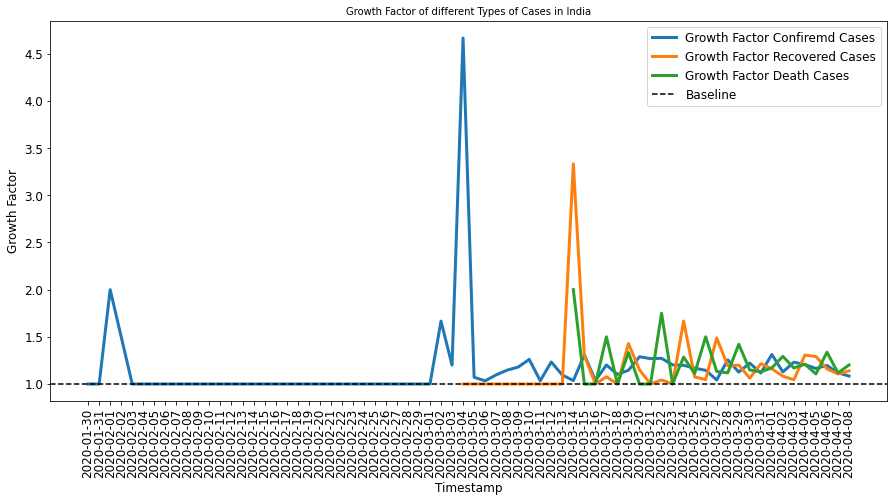

In [19]:
daily_increase_confirmed = []
daily_increase_recovered = []
daily_increase_deaths = []
for i in range(q.shape[0]-1):
    daily_increase_confirmed.append(((q["Confirmed"].iloc[i+1]/q["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((q["Cured"].iloc[i+1]/q["Cured"].iloc[i])))
    daily_increase_deaths.append(((q["Deaths"].iloc[i+1]/q["Deaths"].iloc[i])))
daily_increase_confirmed.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(q['Date_'],daily_increase_confirmed,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(q['Date_'],daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(q['Date_'],daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xticks(rotation=45)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases in India")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

Average increase in number of Confirmed Cases every day:  74.0
Average increase in number of Cured Cases every day:  6.0
Average increase in number of Deaths Cases every day:  2.0


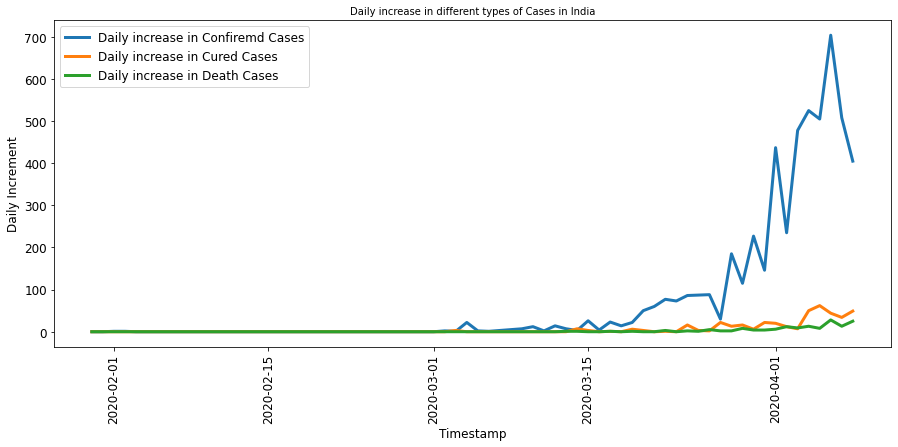

In [20]:
plt.figure(figsize=(15,6))
plt.plot(q["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(q["Cured"].diff().fillna(0),label="Daily increase in Cured Cases",linewidth=3)
plt.plot(q["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different types of Cases in India")
plt.xticks(rotation=90)
plt.legend()
\


print("Average increase in number of Confirmed Cases every day: ",np.round(q["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Cured Cases every day: ",np.round(q["Cured"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(q["Deaths"].diff().fillna(0).mean()))